#  Personal Diary  Tracker

### Goal
Input daily diary entries and track the "Mood Graph" over a week

### Techniques Used
- Sentiment Analysis → to detect daily mood
- Named Entity Recognition (NER) → to extract people/places/orgs influencing mood
- BERT-based Transformers via HuggingFace pipeline




### install dependencies
here we insatll code libraries needed for plotting graph NLP and tabular storage

In [1]:
!pip install transformers torch matplotlib pandas


### Import required libraries
here pipeline gives pretrained models , pandas for storing diary and Matplotlib for graph


In [2]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt


### LOAD PIPELINES USING BERT MODELS
here we have load 2 pipelines:
1.DistilBERT SST2: this is for sentiment classification (positive or negative)
2. BERT Base : named entity recognition(NER)

In [3]:
sentiment = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english'
)

ner = pipeline(
    'ner',
    model='bert-base-cased',
    aggregation_strategy="simple"
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


### Input (diary text)
normal text for a week

In [4]:
diary_entries = {
    "Mon": "Today I went to college, met Riya and we worked on our assignment. Felt tired but happy.",
    "Tue": "I was stressed because of the upcoming exam and barely slept.",
    "Wed": "Had a great day! Went out with family for dinner.",
    "Thu": "Woke up irritated. The bus was late and I missed attendance.",
    "Fri": "Completed my project review successfully. My professor appreciated my work.",
    "Sat": "Went for a walk in the park. Feeling relaxed and peaceful.",
    "Sun": "I was anxious about results but mom comforted me and I felt better."
}


### Process each entry
for each entry it will give mood (positive or negative) with help of sentiment(text)
ner(text):extracts things that influence mood
and it stores everything in list

In [5]:
results = []

for day, text in diary_entries.items():
    sentiment_result = sentiment(text)[0]
    ner_result = ner(text)

    results.append({
        "Day": day,
        "Text": text,
        "Label": sentiment_result['label'],
        "Score": round(sentiment_result['score'], 3),
        "Entities": [e['word'] for e in ner_result]
    })


### Convert To Dataframe
easier view

In [6]:
df = pd.DataFrame(results)
df


,Day,Text,Label,Score,Entities
0,Mon,"Today I went to college, met Riya and we worke...",POSITIVE,1.000,"[Today I went to college, met, R, ##iya and we..."
1,Tue,I was stressed because of the upcoming exam an...,NEGATIVE,0.999,"[I, was, stressed, because of the upcoming exa..."
2,Wed,Had a great day! Went out with family for dinner.,POSITIVE,1.000,"[Had a, great, day! Went, out, with family for..."
3,Thu,Woke up irritated. The bus was late and I miss...,NEGATIVE,1.000,"[W, ##oke up, irritated, . The bus was, late, ..."
4,Fri,Completed my project review successfully. My p...,POSITIVE,1.000,"[Completed my, project, review successfully., ..."
5,Sat,Went for a walk in the park. Feeling relaxed a...,POSITIVE,1.000,[Went for a walk in the park. Feeling relaxed ...
6,Sun,I was anxious about results but mom comforted ...,POSITIVE,0.998,[I was anxious about results but mom comforted...


### Map Sentiment to Numeric
here for graph we need numbers right
so we convert positive to +1 and negative to -1

In [7]:
df['MoodScore'] = df['Label'].map({'POSITIVE': 1, 'NEGATIVE': -1})
df


,Day,Text,Label,Score,Entities,MoodScore
0,Mon,"Today I went to college, met Riya and we worke...",POSITIVE,1.000,"[Today I went to college, met, R, ##iya and we...",1
1,Tue,I was stressed because of the upcoming exam an...,NEGATIVE,0.999,"[I, was, stressed, because of the upcoming exa...",-1
2,Wed,Had a great day! Went out with family for dinner.,POSITIVE,1.000,"[Had a, great, day! Went, out, with family for...",1
3,Thu,Woke up irritated. The bus was late and I miss...,NEGATIVE,1.000,"[W, ##oke up, irritated, . The bus was, late, ...",-1
4,Fri,Completed my project review successfully. My p...,POSITIVE,1.000,"[Completed my, project, review successfully., ...",1
5,Sat,Went for a walk in the park. Feeling relaxed a...,POSITIVE,1.000,[Went for a walk in the park. Feeling relaxed ...,1
6,Sun,I was anxious about results but mom comforted ...,POSITIVE,0.998,[I was anxious about results but mom comforted...,1


### Visualize Mood Graph


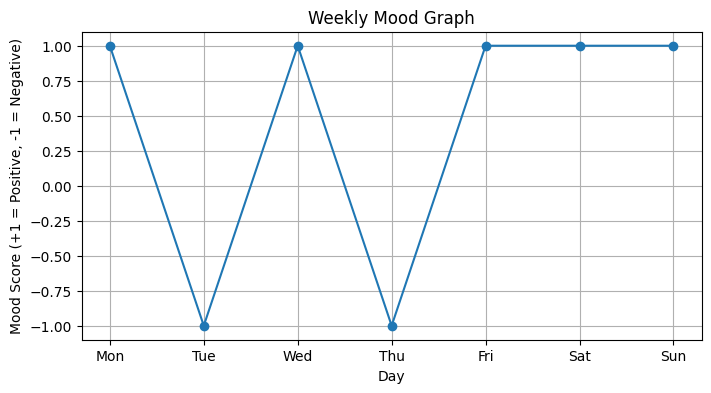

In [8]:
plt.figure(figsize=(8,4))
plt.plot(df['Day'], df['MoodScore'], marker='o')
plt.title("Weekly Mood Graph")
plt.xlabel("Day")
plt.ylabel("Mood Score (+1 = Positive, -1 = Negative)")
plt.grid(True)
plt.show()


### Generate Insights
here we will give number of bad days and number og good days
and who/what influenced mood

In [9]:
positive = (df['MoodScore'] == 1).sum()
negative = (df['MoodScore'] == -1).sum()

top_entities = (
    df.explode('Entities')['Entities']
      .value_counts()
      .head(3)
      .to_dict()
)

print("Weekly Insights:\n")
print(f"Positive Days: {positive}")
print(f"Negative Days: {negative}")
print(f"Top Influencing Entities: {top_entities}")


Weekly Insights:

Positive Days: 5
Negative Days: 2
Top Influencing Entities: {'Today I went to college, met': 1, 'R': 1, '##iya and we worked on': 1}


### SUMMARY
here we will generate weekly report , like his week was positive or negative


In [11]:
if positive > negative:
    print("\nMood Summary: Overall positive week ")
else:
    print("\nMood Summary: Overall stressful week ")



Mood Summary: Overall positive week 
